bbr3 vs bbr3 -upload

✅ CSV saved to: /home/sit/Desktop/fq/bbr3_2flows_upload/cubic_vs_bbr3_download


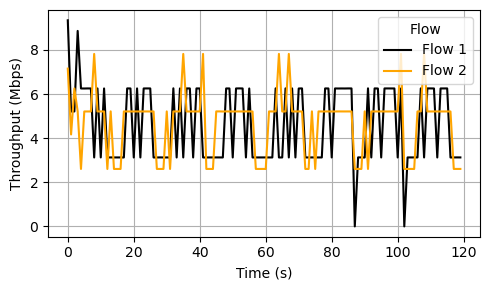

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_upload/bbrv3_plots/throughput.png


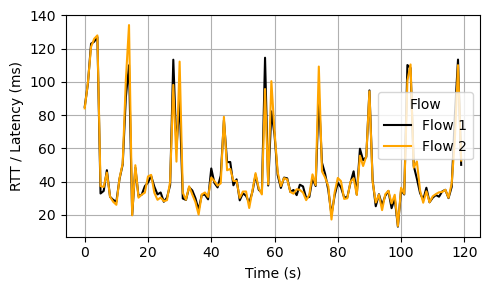

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_upload/bbrv3_plots/rtt.png


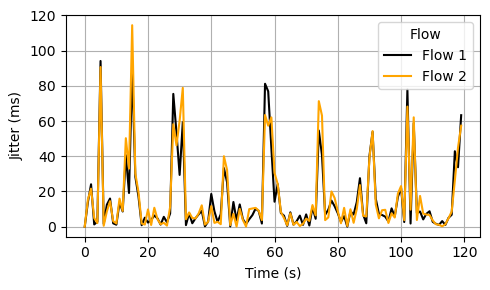

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_upload/bbrv3_plots/jitter.png


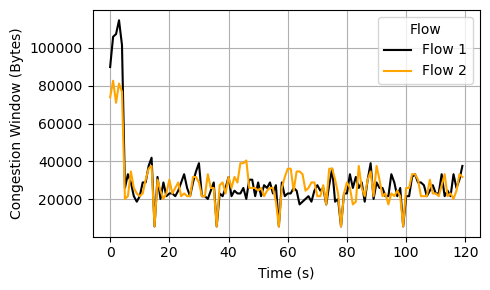

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_upload/bbrv3_plots/cwnd.png


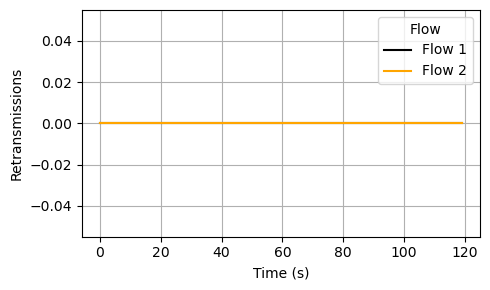

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_upload/bbrv3_plots/retransmits.png


In [62]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/fq/bbr3_2flows_upload",
    file_pattern="bbr3_flow{}_1.json",  # Match actual filenames
    output_csv_name="cubic_vs_bbr3_download",
    algo_name="BBRv3"
)


BBR3 vs bbr3 download -fq codel

✅ CSV saved to: /home/sit/Desktop/fq/bbr3_2flows_download_sender/cubic_vs_bbr3_download


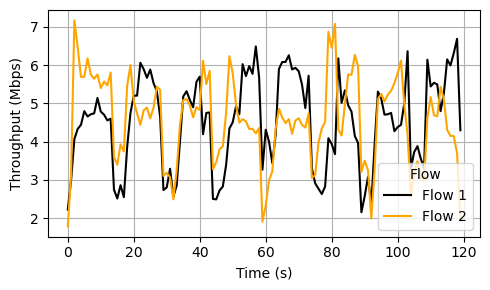

✅ Saved: /home/sit/Desktop/fq/bbr3_2flows_download_sender/bbrv3_plots/throughput.png


In [63]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")


# def plot_metric(df, metric, ylabel, title, save_path):
#     plt.figure(figsize=(5, 3))
#     for label, group in df.groupby("label"):
#         plt.plot(group["time_sec"], group[metric], label=label)
#     plt.xlabel("Time (s)")
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(title="Flow")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(save_path)
#     plt.show()
#     plt.close()
#     print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/fq/bbr3_2flows_download_sender",
    file_pattern="bbr3_flow{}_1.json",  # Match actual filenames
    output_csv_name="cubic_vs_bbr3_download",
    algo_name="BBRv3"
)


Cubic vs bbr3 upload -Fq_codel

✅ CSV saved to: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/bbr3_vs_cubic_metrics.csv


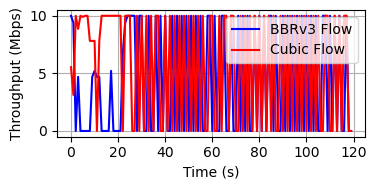

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/throughput.png


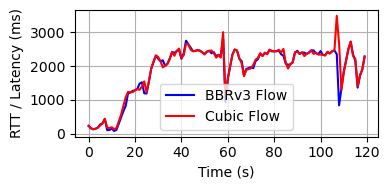

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/rtt.png


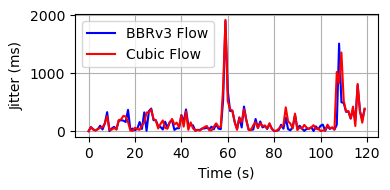

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/jitter.png


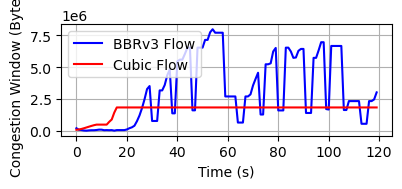

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/cwnd.png


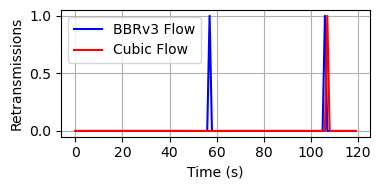

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/retransmits.png


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps":bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(4, 2))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_3.json",
        "Cubic": "cubic_flow1_3.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Desktop/fq/bbr3-vs-cubic-upload",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


✅ CSV saved to: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/bbr3_vs_cubic_metrics.csv


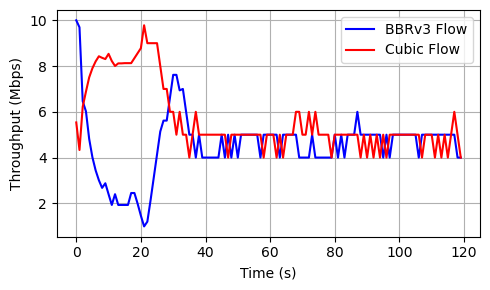

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/throughput.png


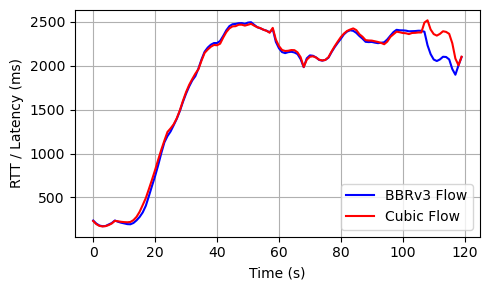

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/rtt.png


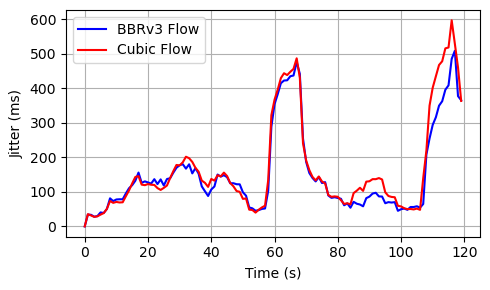

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/jitter.png


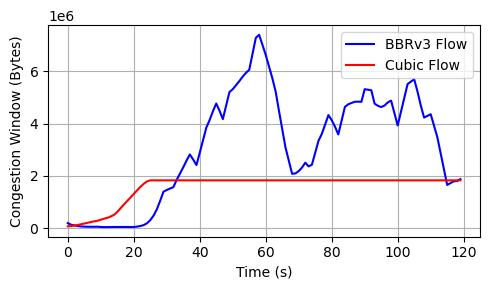

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/cwnd.png


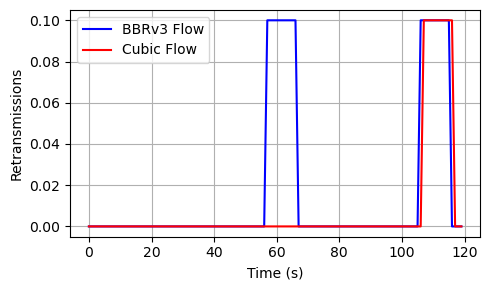

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-upload/mixed_algo_plots/retransmits.png


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps": bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        group_sorted = group.sort_values("time_sec")
        # Apply moving average with window of 10
        smoothed = group_sorted[metric].rolling(window=10, min_periods=1).mean()
        plt.plot(group_sorted["time_sec"], smoothed, label=label, color=color)
        

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_3.json",
        "Cubic": "cubic_flow1_3.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)
  
  

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
process_mixed_algos(
    folder_path="/home/sit/Desktop/fq/bbr3-vs-cubic-upload",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)



✅ CSV saved to: /home/sit/Desktop/fq/bbr3-vs-cubic-download-bbr3/bbr3_vs_cubic_metrics.csv


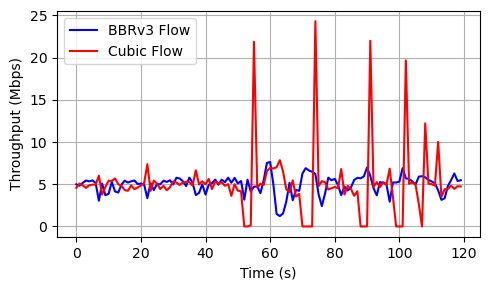

✅ Saved: /home/sit/Desktop/fq/bbr3-vs-cubic-download-bbr3/mixed_algo_plots/throughput.png


In [60]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "blue",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr3_flow1_2.json",
        "Cubic": "cubic_flow1_2.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Desktop/fq/bbr3-vs-cubic-download-bbr3",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


✅ CSV saved to: /home/sit/Desktop/fq/cubic-vs-cubic-upload/cubic_vs_cubic_upload


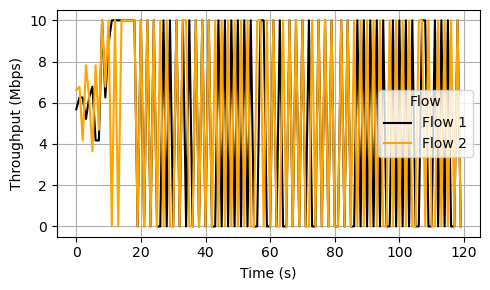

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-upload/bbrv3_plots/throughput.png


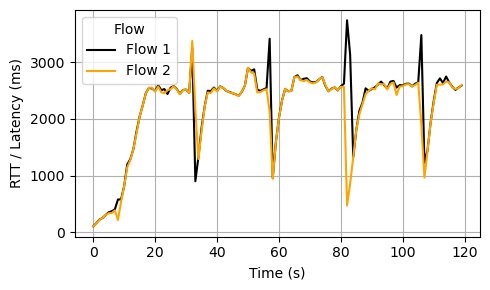

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-upload/bbrv3_plots/rtt.png


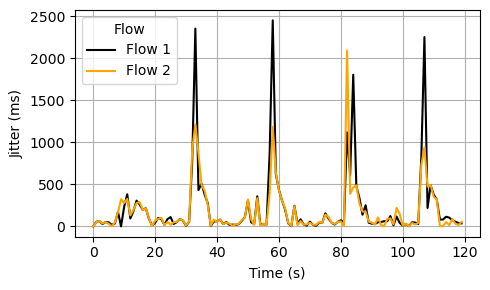

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-upload/bbrv3_plots/jitter.png


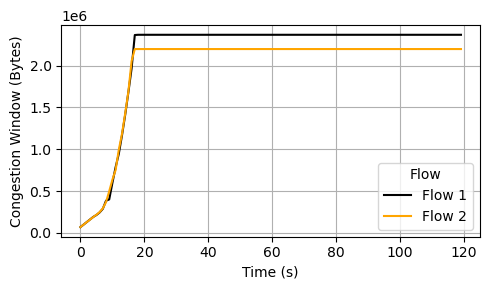

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-upload/bbrv3_plots/cwnd.png


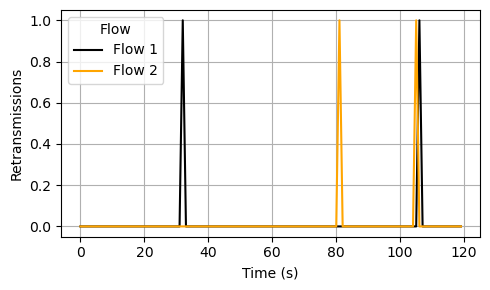

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-upload/bbrv3_plots/retransmits.png


In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms
        bitspersec=min(stream.get("bits_per_second", 0) / 1e6, 10)


        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps":bitspersec,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)
        

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/fq/cubic-vs-cubic-upload",
    file_pattern="cubic_flow{}_1.json",  # Match actual filenames
    output_csv_name="cubic_vs_cubic_upload",
    algo_name="BBRv3"
)


✅ CSV saved to: /home/sit/Desktop/fq/cubic-vs-cubic-download-cubic/cubic_vs_cubic_download


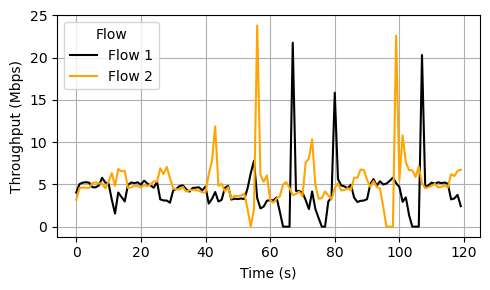

✅ Saved: /home/sit/Desktop/fq/cubic-vs-cubic-download-cubic/bbrv3_plots/throughput.png


In [67]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = 0  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Desktop/fq/cubic-vs-cubic-download-cubic",
    file_pattern="cubic_flow{}_1.json",  # Match actual filenames
    output_csv_name="cubic_vs_cubic_download",
    algo_name="BBRv3"
)
